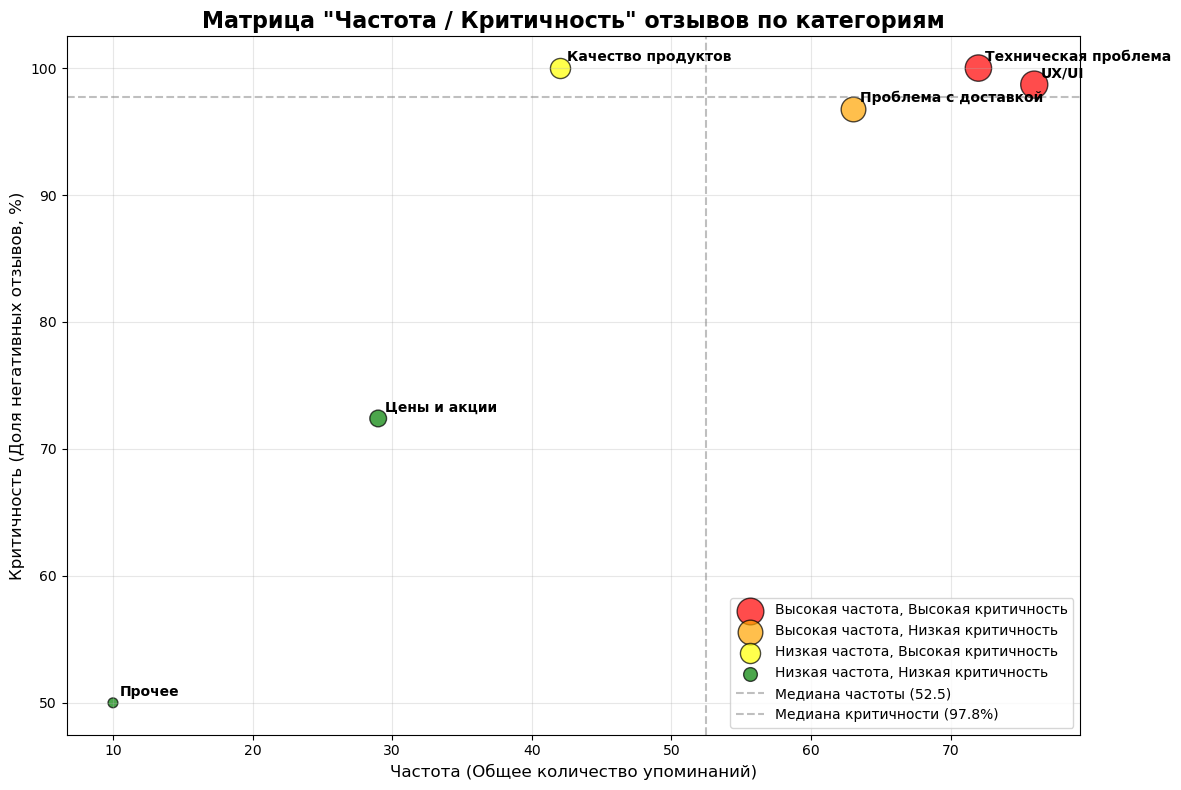

МАТРИЦА ЧАСТОТА / КРИТИЧНОСТЬ (формат для Markdown)

| Категория | Частота | Критичность | Квадрант |
|---|---|---|---|
| UX/UI | 76 | 98.7% | Высокая частота, Высокая критичность |
| Техническая проблема | 72 | 100.0% | Высокая частота, Высокая критичность |
| Проблема с доставкой | 63 | 96.8% | Высокая частота, Низкая критичность |
| Качество продуктов | 42 | 100.0% | Низкая частота, Высокая критичность |
| Цены и акции | 29 | 72.4% | Низкая частота, Низкая критичность |
| Прочее | 10 | 50.0% | Низкая частота, Низкая критичность |

**Легенда квадрантов:**
- 🔴 **Высокая частота, Высокая критичность**: Приоритет №1 для решения
- 🟠 **Высокая частота, Низкая критичность**: Требует оптимизации
- 🟡 **Низкая частота, Высокая критичность**: Требует точечного решения
- 🟢 **Низкая частота, Низкая критичность**: Низкий приоритет

**Статистика:**
- Медиана частоты: 52.5 упоминаний
- Медиана критичности: 97.8% негатива
- Всего упоминаний: 292
- Средняя доля негатива: 86.3%


<class 'ModuleNotFoundError'>: No module named 'openpyxl'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

# Исходные данные
data = """Категория,Негативный,Нейтральный,Позитивный,Итого,Доля негатива
Техническая проблема,72,0,0,72,100.0
UX/UI,75,1,0,76,98.7
Проблема с доставкой,61,2,0,63,96.8
Качество продуктов,42,0,0,42,100.0
Цены и акции,21,0,8,29,72.4
Прочее,5,5,0,10,50.0"""

# Чтение данных в DataFrame
df = pd.read_csv(StringIO(data), decimal='.')

# Функция для определения квадранта
def assign_quadrant(frequency, criticality):
    freq_median = df['Итого'].median()
    crit_median = df['Доля негатива'].median()
    
    if frequency >= freq_median and criticality >= crit_median:
        return 'Высокая частота, Высокая критичность'
    elif frequency >= freq_median and criticality < crit_median:
        return 'Высокая частота, Низкая критичность'
    elif frequency < freq_median and criticality >= crit_median:
        return 'Низкая частота, Высокая критичность'
    else:
        return 'Низкая частота, Низкая критичность'

# Создание колонки с квадрантом
df['Квадрант'] = df.apply(lambda row: assign_quadrant(row['Итого'], row['Доля негатива']), axis=1)

# 1. ВИЗУАЛИЗАЦИЯ (Scatter Plot)
plt.figure(figsize=(12, 8))

# Цвета для квадрантов
colors = {
    'Высокая частота, Высокая критичность': 'red',
    'Высокая частота, Низкая критичность': 'orange',
    'Низкая частота, Высокая критичность': 'yellow',
    'Низкая частота, Низкая критичность': 'green'
}

# Создание scatter plot
for category in df['Квадрант'].unique():
    subset = df[df['Квадрант'] == category]
    plt.scatter(subset['Итого'], subset['Доля негатива'], 
                s=subset['Итого']*5, alpha=0.7, 
                c=colors[category], label=category, 
                edgecolors='black', linewidth=1)

# Добавление названий категорий
for i, row in df.iterrows():
    plt.annotate(row['Категория'], 
                (row['Итого'], row['Доля негатива']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

# Линии медиан
plt.axvline(x=df['Итого'].median(), color='gray', linestyle='--', alpha=0.5, label=f'Медиана частоты ({df["Итого"].median():.1f})')
plt.axhline(y=df['Доля негатива'].median(), color='gray', linestyle='--', alpha=0.5, label=f'Медиана критичности ({df["Доля негатива"].median():.1f}%)')

# Настройки графика
plt.title('Матрица "Частота / Критичность" отзывов по категориям', fontsize=16, fontweight='bold')
plt.xlabel('Частота (Общее количество упоминаний)', fontsize=12)
plt.ylabel('Критичность (Доля негативных отзывов, %)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()

# Сохранение графика
plt.savefig('frequency_criticality_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. ФОРМАТ ДЛЯ MARKDOWN
print("="*80)
print("МАТРИЦА ЧАСТОТА / КРИТИЧНОСТЬ (формат для Markdown)")
print("="*80)
print()

# Создаем упорядоченную таблицу
md_df = df[['Категория', 'Итого', 'Доля негатива', 'Квадрант']].copy()
md_df = md_df.sort_values(['Итого', 'Доля негатива'], ascending=[False, False])

# Вывод в Markdown формате
print("| Категория | Частота | Критичность | Квадрант |")
print("|---|---|---|---|")
for _, row in md_df.iterrows():
    print(f"| {row['Категория']} | {row['Итого']} | {row['Доля негатива']:.1f}% | {row['Квадрант']} |")

print()
print("**Легенда квадрантов:**")
print("- 🔴 **Высокая частота, Высокая критичность**: Приоритет №1 для решения")
print("- 🟠 **Высокая частота, Низкая критичность**: Требует оптимизации")
print("- 🟡 **Низкая частота, Высокая критичность**: Требует точечного решения")
print("- 🟢 **Низкая частота, Низкая критичность**: Низкий приоритет")

print()
print("**Статистика:**")
print(f"- Медиана частоты: {df['Итого'].median():.1f} упоминаний")
print(f"- Медиана критичности: {df['Доля негатива'].median():.1f}% негатива")
print(f"- Всего упоминаний: {df['Итого'].sum()}")
print(f"- Средняя доля негатива: {df['Доля негатива'].mean():.1f}%")

# 3. ФОРМАТ ДЛЯ EXCEL (создаем расширенный DataFrame)
excel_df = df.copy()

# Добавляем дополнительные расчеты для Excel
excel_df['Приоритет'] = excel_df['Квадрант'].map({
    'Высокая частота, Высокая критичность': 1,
    'Низкая частота, Высокая критичность': 2,
    'Высокая частота, Низкая критичность': 3,
    'Низкая частота, Низкая критичность': 4
})

# Сортируем по приоритету
excel_df = excel_df.sort_values('Приоритет')

# Сохраняем в Excel
with pd.ExcelWriter('frequency_criticality_matrix.xlsx', engine='openpyxl') as writer:
    # Основная таблица
    excel_df.to_excel(writer, sheet_name='Матрица', index=False)
    
    # Сводная таблица по квадрантам
    quadrant_summary = excel_df.groupby('Квадрант').agg({
        'Категория': 'count',
        'Итого': 'sum',
        'Доля негатива': 'mean'
    }).round(1)
    quadrant_summary.columns = ['Количество категорий', 'Суммарная частота', 'Средняя критичность']
    quadrant_summary.to_excel(writer, sheet_name='Сводка по квадрантам')
    
    # Статистика
    stats_df = pd.DataFrame({
        'Метрика': ['Медиана частоты', 'Медиана критичности', 'Общая частота', 'Средняя критичность'],
        'Значение': [
            df['Итого'].median(),
            df['Доля негатива'].median(),
            df['Итого'].sum(),
            df['Доля негатива'].mean()
        ]
    })
    stats_df.to_excel(writer, sheet_name='Статистика', index=False)

print()
print("="*80)
print("РЕЗУЛЬТАТЫ:")
print("="*80)
print(f"1. График сохранен как: frequency_criticality_matrix.png")
print(f"2. Excel файл с данными сохранен как: frequency_criticality_matrix.xlsx")
print(f"3. Таблица для Markdown сгенерирована выше")
print()
print("Excel файл содержит 3 листа:")
print("  - 'Матрица': полные данные с приоритетами")
print("  - 'Сводка по квадрантам': группировка по квадрантам")
print("  - 'Статистика': основные метрики")